# 数据特征分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
warnings.filterwarnings('ignore')
%matplotlib inline

## 分布分析
**分布分析**：研究数据的分布特征和分布类型。将基本统计量分为**定量数据**、**定性数据**  
* 分布分析主要包括以下内容：
    * 极差
    * 频率分布情况
    * 分组组距及组数

## 对比分析
**对比分析**：两个相互联系的指标间进行比较
对比分析主要包括：
1. 绝对数比较(相减)
2. 相对数比较(相除)
    1. 结构分析
    2. 比例分析
    3. 空间比较分析
    4. 动态对比分析

### 绝对数比较 (相减)
要求相互对比的指标在**量级上不能相差过大**


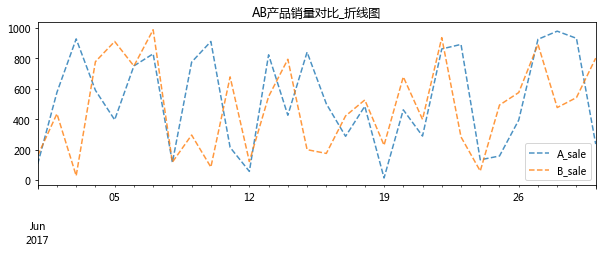

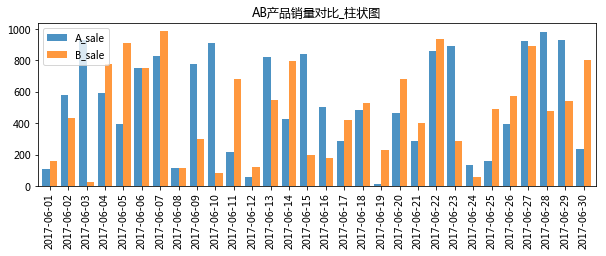

In [2]:
# 创建数据，A&B两类产品30日销量数据
data = pd.DataFrame(np.random.rand(30, 2)*1000,
                   columns=['A_sale', 'B_sale'],
                   index=pd.period_range('20170601', '20170630'))

# 折线图比较
data.plot(kind='line',
         style='--',
         alpha=0.8,
         figsize=(10, 3),
         title='AB产品销量对比_折线图')

# 多系列柱状图比较
data.plot(kind='bar',
         width=0.8,
         alpha=0.8,
         figsize=(10, 3),
         title='AB产品销量对比_柱状图')

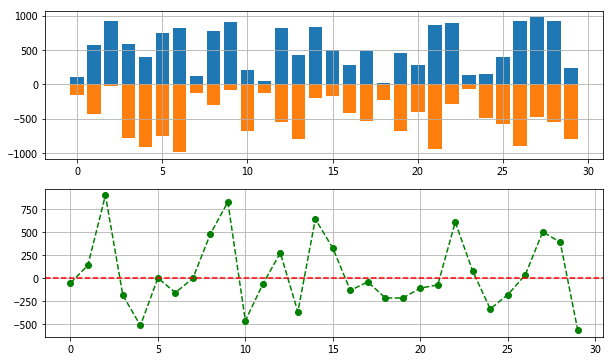

In [3]:
# 绝对数比较 -- 相减

x = range(len(data))
y1 = data['A_sale']
y2 = data['B_sale']

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
plt.bar(x, y1)
plt.bar(x, -y2)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
plt.plot(x, y1-y2, '--go')
plt.grid()
plt.axhline(0, color='r', linestyle='--') # 参考线

### 绝对数比较（相除）

**课程资料缺失**

## 统计分析
**统计分析**：对**定量数据**进行统计描述。  
常从**集中趋势**和**离中趋势**两个方面进行分析。

### 集中趋势度量
**集中趋势度量**：一组数据向某一中心靠拢的倾向，核心在于**寻找数据的代表值或中心值** -- 统计平均数
* 算数平均数
* 位置平均数

#### 算数平均数
算数平均数分为：**简单算数平均数** & **加权算术平均数**
* 简单算数平均数 = 总和 / 样本数
* 加权算术平均数 = $ (x_1f_1+x_2f_2+...+x_nf_n) / (f_1+f_2+...+f_n) $  
    ($ f_i $为对应权重)

In [4]:
# 算数平均数

data = pd.DataFrame({
        'value': np.random.randint(100, 120, 100),
        'f': np.random.rand(100)
        })
data['f'] = data['f'] / data['f'].sum() # f列设为权重，总和为1

mean = data['value'].mean()
print('简单平均数%.2f' % mean)

mean_w = (data['value']*data['f']).sum() / data['f'].sum()
print('加权平均数%.2f' % mean_w)
data.head()

简单平均数108.91
加权平均数108.82


,value,f
0,112,0.002386
1,102,0.007207
2,103,0.006994
3,116,0.011766
4,107,0.013062


#### 位置平均数
众数 & 中位数
* **众数**：一组数据中出现次数最多的数，可能有多个值
* **中位数**：一组数据按照大小顺序排序后处于中间位置的数

众数为: [108]
中位数为: 108.0


Text(113.0, 0.03, '中位数为108.00')

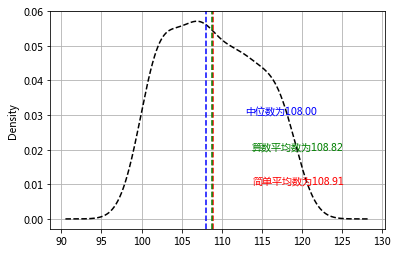

In [5]:
# 众数

m = data['value'].mode().tolist()
print('众数为:', m)

med = data['value'].median()
print('中位数为:', med)

# 密度曲线
data['value'].plot(kind='kde', style='--k', grid=True)
plt.axvline(mean, color='r', linestyle='--')
plt.text(mean+5, 0.01, '简单平均数为%.2f' % mean, color='r')
plt.axvline(mean_w, color='g', linestyle='--')
plt.text(mean_w+5, 0.02, '算数平均数为%.2f' % mean_w, color='g')
plt.axvline(med, color='b', linestyle='--')
plt.text(med+5, 0.03, '中位数为%.2f' % med, color='b')

### 离中趋势度量
**离中趋势度量**：一组数据各数据以不同程度的距离偏离中心的趋势
* 极差&分位差
* 方差&标准差
* 离散系数

#### 极差&分位差
* **极差**：一组数据中最大值与最小值之差  
（未考虑中间变量的变动，测定离中趋势不稳定）  
* **分位差**：$ IQR = Q_3-Q_1 $ 第三分位数-第一分位数

A销售额极差为: 842.23, B销售额极差为: 972.49
A销售额的分位差为：398.03，B销售额的分位差为：586.89


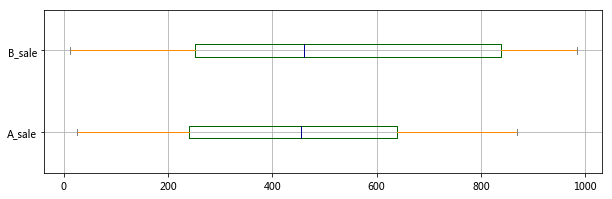

In [6]:
data = pd.DataFrame({
    'A_sale': np.random.rand(30)*1000,
    'B_sale': np.random.rand(30)*1000},
    index=pd.period_range('20170601', '20170630'))

a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A销售额极差为: %.2f, B销售额极差为: %.2f' % (a_r, b_r))

sta = data['A_sale'].describe() # 描述性统计
stb = data['B_sale'].describe()
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f，B销售额的分位差为：%.2f' % (a_iqr, b_iqr))

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid=True, color=color, figsize=(10, 3))

#### 方差&标准差
* 方差：各组中数值与算数平均数离差平方和的算数平均数
* 标准差：方差的平方
    - 标准差是最常用的离中趋势指标，标准差越大，离中趋势越明显

A销售额的标准差为：251.49，B销售额的标准差为：316.10
A销售额的方差为：63246.28，B销售额的方差为：99916.70


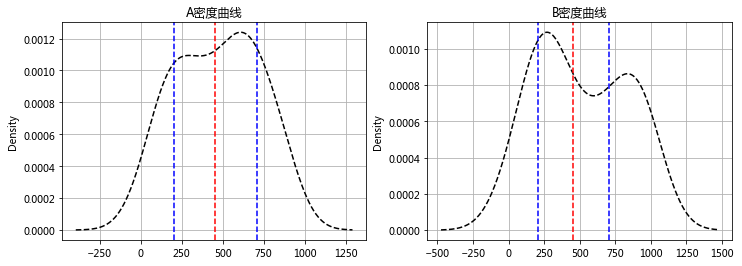

In [8]:
a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差为：%.2f，B销售额的标准差为：%.2f' % (a_std, b_std))
print('A销售额的方差为：%.2f，B销售额的方差为：%.2f' % (a_var, b_var))

# A密度曲线，1个标准差
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
data['A_sale'].plot(kind='kde', style='k--', grid=True, title='A密度曲线')
plt.axvline(sta.loc['50%'], color='r', linestyle='--')
plt.axvline(sta.loc['50%']-a_std, color='b', linestyle='--')
plt.axvline(sta.loc['50%']+a_std, color='b', linestyle='--')

# B密度曲线，1个标准差
ax1 = fig.add_subplot(1, 2, 2)
data['B_sale'].plot(kind='kde', style='k--', grid=True, title='B密度曲线')
plt.axvline(sta.loc['50%'], color='r', linestyle='--')
plt.axvline(sta.loc['50%']-a_std, color='b', linestyle='--')
plt.axvline(sta.loc['50%']+a_std, color='b', linestyle='--')

## 帕累托分析（贡献度分析）
1. **帕累托法则**：二八定律  
原因和结果、投入和产出、努力和报酬之间存在着无法解释的不平衡。一般来说，投入可以分为两种不同的类别：  
    * 多数投入产生少数收益
    * 少数投入产生主要收益
2. 通过**二八原则**，寻找关键的20%决定性因素

超过80%累计占比的节点值索引为： I
超过80%累计占比的节点值索引位置为： 6


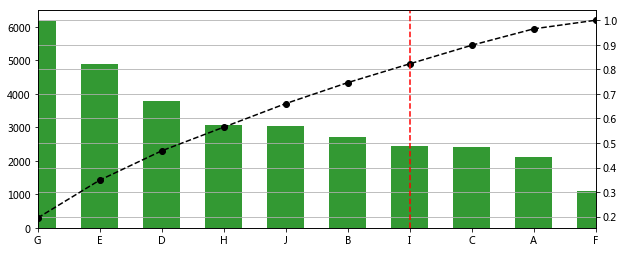

In [28]:
# 10类产品的销售额
data = pd.Series(np.random.randn(10)*1200+3000,
                   index=list('ABCDEFGHIJ'))
data.sort_values(ascending=False, inplace=True)

# 营收柱状图
plt.figure(figsize=(10, 4))
data.plot(kind='bar', color='g', alpha=0.8, width=0.6)

# 累计占比p
p = data.cumsum() / data.sum()
key = p[p>0.8].index[0]
key_num = data.index.tolist().index(key)
print('超过80%累计占比的节点值索引为：', key)
print('超过80%累计占比的节点值索引位置为：', key_num)

p.plot(style='--ko', secondary_y=True)
plt.grid()
plt.axvline(key_num, color='r', linestyle='--')

## 正太性检测
1. **正太性检验**：利用观测数据判断**总体是否服从正态分布**的检验。是统计判决中重要的一种特殊的拟合优度假设检验


2. **正态分布/高斯分布**：随机变量X服从一个**数学期望为$\mu$，方差为$\sigma^2$的分布，记为$N(\mu, \sigma^2)$
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2}) $$
当$\mu$=0，$\sigma$=1时，为**标准正态分布**
$$ f(x) = \frac{1}{\sqrt{2\pi}}e^{(-\frac{x_2}{2})}$$


3. 正态分布特性
    1. **集中性**：正态曲线的高峰位于正中央，即平均数所处位置
    2. **对称性**：正态曲线以平均数为中心，左右对称；曲线两端永远不与横轴相交
    3. **均匀变动性**：正态曲线由平均数所在处开始，分别向左右两侧逐渐均匀下降
    4. 曲线与横轴间的面积恒等于1，相当于概率密度函数的函数从$+\infty$到$-\infty$的概率为1
    5. $\mu$决定分布的中心位置
    6. $\sigma$越大，曲线越矮胖，总体分布越分散；反之曲线越瘦高，总体分布越集中
    
    
4. 实际数据分析中的正态分布
    1. 不是所有数据都满足正态分布
    2. 不是必须满足正态分布才能做分析
    3. 通过正态分布作为参考去理解事物规律
    
    
5. 正态分布的检验
    1. 直方图初判
    2. QQ图判别
    3. K—S检验

       value
0   9.194225
1   9.693324
2   9.351299
3   8.861831
4  10.477082


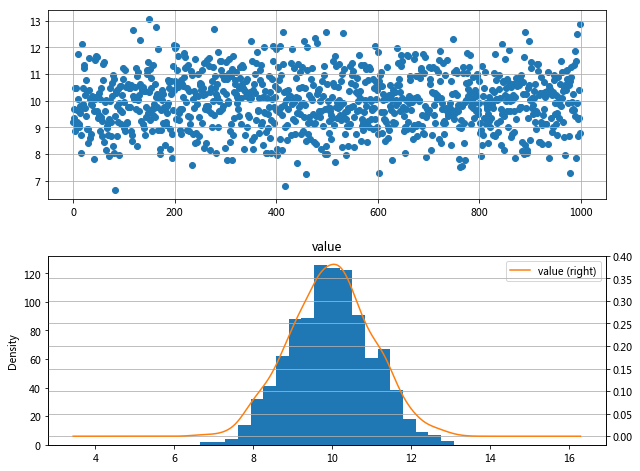

In [37]:
# 直方图判断

s = pd.DataFrame(np.random.randn(1000)+10, columns=['value'])
print(s.head())

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(s.index, s.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
s.hist(bins=20, ax=ax2)
s.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

### QQ图判断
1. **QQ图**通过把测试样本数据的**分位数**与已知分布相比较，从而来检验数据的分布情况
2. **QQ图**是一种散点图。对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图  
参考直线：四分之一位点 & 四分之三位点
3. 绘制思路
    1. 数据清洗后，对数据进行排序（次序统计量，x(1)<x(2)<...<x(n)）
    2. 排序后，计算出每个数据对应的**百分位数p(i)**，即第i个数据x(i)为p(i)分位数。其中$$ p_{(i)}=\frac{(i-0.5)}{n} $$  （p(i)有其他多重算法）
    3. 绘制直方图+QQ图

       value
0   8.829258
1   9.748023
2  10.166261
3   8.746283
4   9.705523
均值为：9.98，标准差为：1.02


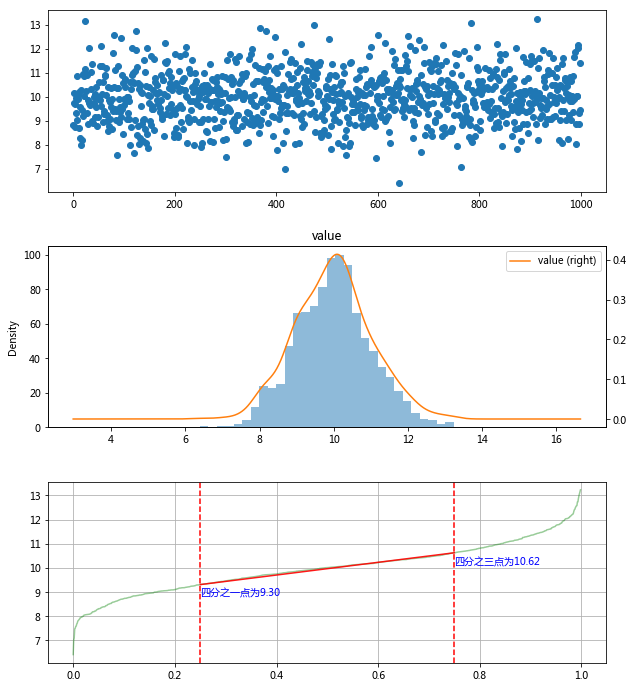

In [78]:
s = pd.DataFrame(np.random.randn(1000)+10, columns=['value'])
print(s.head())

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean, std))

st = s['value'].describe()
x1, y1 = 0.25, st['25%'] # 四分之一点
x2, y2 = 0.75, st['75%'] # 四分之三点

s.sort_values('value', ascending=True, inplace=True)
s_r = s.reset_index(drop=True)
s_r['p'] = (s_r.index-0.5) / len(s) # 计算P(i)
s_r['q'] = (s_r['value']-mean) / std # 标准化

fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(3, 1, 1)
ax1.scatter(s.index, s.value) # 数据分布图

ax2 = fig.add_subplot(3, 1, 2)
s.hist(bins=30, alpha=0.5, ax=ax2)
s.plot(kind='kde', secondary_y=True, ax=ax2) # 直方图

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(s_r['p'], s_r['value'], 'g', alpha=0.4) # QQ图
ax3.plot([x1, x2], [y1, y2], '-r', alpha=0.9)
plt.axvline(x1, color='r', linestyle='--')
plt.text(x1, y1-0.5, '四分之一点为%.2f' % y1, color='b')
plt.axvline(x2, color='r', linestyle='--')
plt.text(x2, y2-0.5, '四分之三点为%.2f' % y2, color='b')
plt.grid()

### K-S检验
1. Kolmogorov-Smirnov是比较一个**频率分布f(x)**与**理论分布g(x)**或者两个观测值分布的检验方法。

2. 以样本数据的**累计频数分布**与**特定的理论分布比较（如生态分布），如果两者差距小，则推测样本分布取自某特定分布
    1. 假设检验问题：  
    H0:样本的总体分布**服从**某特定分布  
    H1:样本的总体分布**不服从**某特定分布  
    
    2. 函数  
    Fn(x)：样本的累计分布函数  
    F0(x)：理论分布的分布函数  
    D：F0(x)与Fn(x)差值的绝对值最大值  
    D = max |Fn(x) - F0(x)|
    
    3. 结果  
    D > D(n, $\alpha$)比较：  
    p>0.05则接受H0，p<0.05则拒绝H0接受H1
    
3. scipy.stats  
stats.kstest(待检验的数据, 检验方法, (均值, 标准差))  
该方法返回两个值：statistic --> D值；pvalue --> P值。  
pvalue>0.05则符合检验方法

样本均值为79.74, 样本标准差为5.94
实际观测D值为：0.1597
查询显著性对照表，可以确定p值>0.05


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


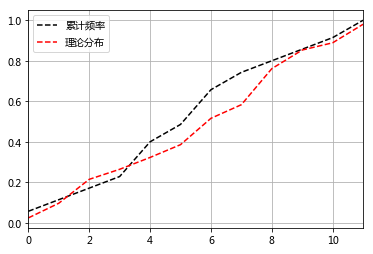

In [86]:
# 基本推导

data = [87, 77, 92, 68, 80, 78, 84, 77, 81, 80, 80, 77, 92, 86,
       76, 80, 81, 75, 77, 72, 81, 72, 84, 86, 80, 68, 77, 87,
       76, 77, 78, 92, 75, 80, 78]

df = pd.DataFrame(data, columns=['value'])
u = df['value'].mean() # 均值
std = df['value'].std() # 标准差
print('样本均值为%.2f, 样本标准差为%.2f' % (u, std))

s = df['value'].value_counts().sort_index() # 排序
df_s = pd.DataFrame({'血糖浓度': s.index,
                    '次数': s.values})

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度']-u) / std # 将原数据转化为标准正态分布
# 查阅正态分布表得
df_s['理论分布'] = [0.0244, 0.0968, 0.2148, 0.2643, 0.3228, 0.3859, 0.5160, 0.5832, 0.7611, 0.8531, 0.8888, 0.9803]
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max() # D的最大值
print('实际观测D值为：%.4f' % dmax)
print('查询显著性对照表，可以确定p值>0.05')

df_s['累计频率'].plot(style='--k')
df_s['理论分布'].plot(style='--r')
plt.legend(loc='best')
plt.grid()

df_s

In [80]:
# 使用scipy.stats

from scipy import stats

data = [87, 77, 92, 68, 80, 78, 84, 77, 81, 80, 80, 77, 92, 86,
       76, 80, 81, 75, 77, 72, 81, 72, 84, 86, 80, 68, 77, 87,
       76, 77, 78, 92, 75, 80, 78]

df = pd.DataFrame(data, columns=['value'])
u = df['value'].mean() # 均值
std = df['value'].std() # 标准差

# K-S检验，返回p>0.05, 则数据服从正态分布
stats.kstest(df['value'], 'norm', (u, std))

KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

## 相关性分析
**相关性分析**：对**两个或多个具备相关性**的变量元素进行分析，从而衡量变量因素间的**相关密切程度**  
相关性分析的元素之间**需要存在一定的联系或者概率**才可以进行相关性分析
* 图示初判
* Pearson相关系数（皮尔森相关系数）
* Sperman秩相关系数（斯皮尔曼相关系数）

### 图示

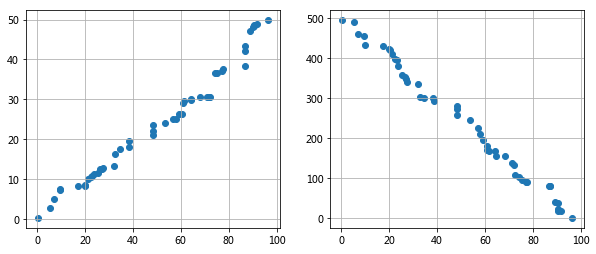

In [88]:
# 变量间的线性相关性

data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending=False)

# 正线性相关
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(data1, data2)
plt.grid()

# 负线性相关
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(data1, data3)
plt.grid()

,A,B,C,D
0,-112.805534,30.441872,-59.137007,5.393323
1,-35.072057,86.428375,34.611133,-64.181873
2,-76.394033,-19.346900,8.487773,-43.451080
3,80.638940,187.599065,-126.633965,17.140497
4,-118.515016,-4.855294,41.930831,-69.588166


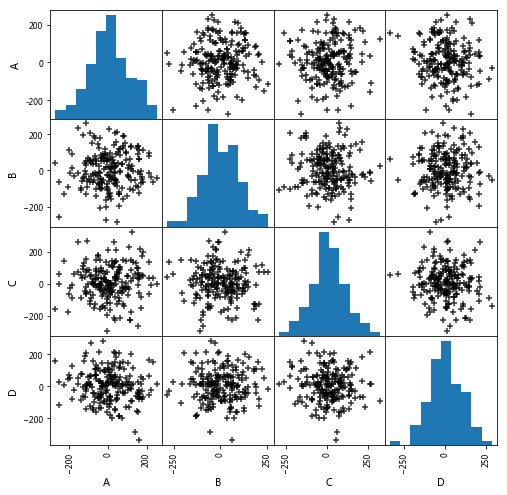

In [94]:
# 多变量间关系 -- 散点图矩阵

data = pd.DataFrame(np.random.randn(200, 4)*100, columns=['A', 'B', 'C', 'D'])
pd.plotting.scatter_matrix(data, figsize=(8, 8),
                 c='k', marker='+',
                 diagonal='hist', alpha=0.8, range_padding=0.1)
data.head()

### Pearson相关系数
1. 皮尔森相关系数 (Pearson correlation coefficient)：也称皮尔森矩阵相关系数 (Pearson product-moment correlation coefficient)，是一种线性相关系数，可以衡量向量相似度。

2. **Pearson ～ [-1, 1]**，0表示无线性相关，负值为负相关，正值为正相关
    * |r| <= 0.3 --> 无线性相关
    * 0.3 < |r| < 0.5  --> 低线性相关
    * 0.5 < |r| < 0.8  --> 显著线性相关
    * |r| >= 0.8 --> 高度线性相关

3. 前提条件：  
数据符合**正态分布**  
$$ \rho(X, Y) = \frac{E[(X-\mu x)(Y-\mu y)]}{\delta x \delta y} $$

value1正态性检验： KstestResult(statistic=0.08419893988548416, pvalue=0.4583993983487722)
value2正态性检验： KstestResult(statistic=0.08327963271802918, pvalue=0.47303884536875573)
正态性检验，p>0.05，都符合正态分布
Pearson相关系数为：0.9929，高度线性相关


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30d8bd68>,
      dtype=object)

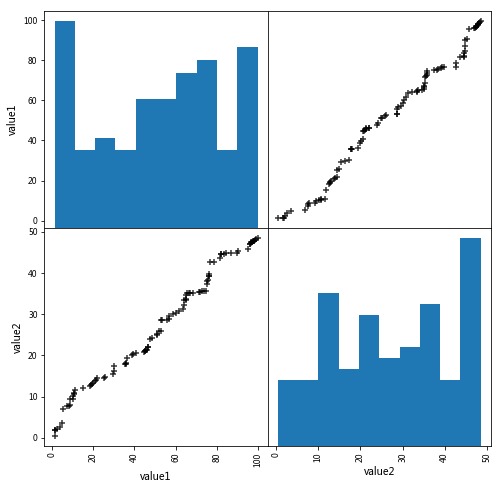

In [103]:
data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({
        'value1': data1.values,
        'value2': data2.values
    })

u1, u2 = data['value1'].mean(), data['value2'].mean()
std1, std2 = data['value1'].std(), data['value2'].std()
print('value1正态性检验：', stats.kstest(data['value1'], 'norm', (u1, std1)))
print('value2正态性检验：', stats.kstest(data['value2'], 'norm', (u2, std2)))
print("正态性检验，p>0.05，都符合正态分布")

data['(x-u1)*(y-u2)'] = (data['value1']-u1) * (data['value2']-u2)
data['(x-u1)**2'] = (data['value1']-u1)**2
data['(y-u2)**2'] = (data['value2']-u2)**2

r = data['(x-u1)*(y-u2)'].sum() / (np.sqrt(data['(x-u1)**2'].sum() * data['(y-u2)**2'].sum()))
print('Pearson相关系数为：%.4f，高度线性相关' % r)

pd.plotting.scatter_matrix(data[['value1', 'value2']], figsize=(8, 8),
                 c='k', marker='+',
                 diagonal='hist', alpha=0.8, range_padding=0.1)

In [105]:
# pandas.corr(method='pearson', min_periods=1) 默认为皮尔森相关系数

data = pd.DataFrame({
        'value1': data1.values,
        'value2': data2.values
    })
data.corr()

,value1,value2
value1,1.000000,0.992897
value2,0.992897,1.000000


### Sperman秩相关系数
1. **Spearman秩相关系数**：用于不太服从正态分布的变量/分类的关联性  
**Pearson相关系数**：主要用于服从**正态分布**的连续变量
2. 计算逻辑
    1. 对两个变量成堆的取值，按照从小到大顺序编秩。
        1. **Rx**：Xi的秩次
        2. **Ry**：Yi的秩次
        3. 如果两个值大小一样，秩次为(index1+index2)/2
    2. di = Rx - Ry
    3. $$ \rho _s = 1 - \frac{6\sum{d^2_i}}{n(n^2-1)} $$
3. Spearman系数和Pearson系数在效率上等价

In [108]:
data = pd.DataFrame({
        '智商': [106, 86, 100, 101, 99, 103, 97, 113, 112, 110],
        '每周看电视小时数': [7, 0, 27, 50, 28, 29, 20, 12, 6, 17]
    })
data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1, len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1, len(data)+1)

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2

n = len(data)
rs = 1 - 6*(data['d2'].sum())/(n*(n**2-1))
print('Pearson相关系数为：%.4f' % rs)

data.head()

Pearson相关系数为：-0.1758


,智商,每周看电视小时数,range1,range2,d,d2
1,86,0,1,1,0,0
8,112,6,9,2,7,49
0,106,7,7,3,4,16
7,113,12,10,4,6,36
9,110,17,8,5,3,9


In [109]:
# pandas.corr()

data = pd.DataFrame({
        '智商': [106, 86, 100, 101, 99, 103, 97, 113, 112, 110],
        '每周看电视小时数': [7, 0, 27, 50, 28, 29, 20, 12, 6, 17]
    })
data.corr(method='spearman')

,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000
